In [46]:
import re
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [47]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [48]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [49]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,488,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,489,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,490,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,491,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


In [5]:
beers_and_breweries = pd.merge(beers_df, 
                               breweries_df, 
                               how='inner', 
                               left_on="brewery_id", 
                               right_on="id", 
                               sort=True,
                               suffixes=('_beer', '_brewery'))

KeyError: 'id'

In [50]:
beers.dtypes

NameError: name 'beers' is not defined

In [51]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [52]:
print_categories(beers)

NameError: name 'beers' is not defined

In [53]:
brew_group = poop_df.groupby('style')

In [54]:
count_brew = brew_group['style'].count()

count_brew

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: style, Length: 99, dtype: int64

In [55]:
state_data = poop_df["state"].value_counts()
style_data = poop_df["style"].value_counts()

In [56]:
style_state_data= state_data.add(style_data, fill_value=0)

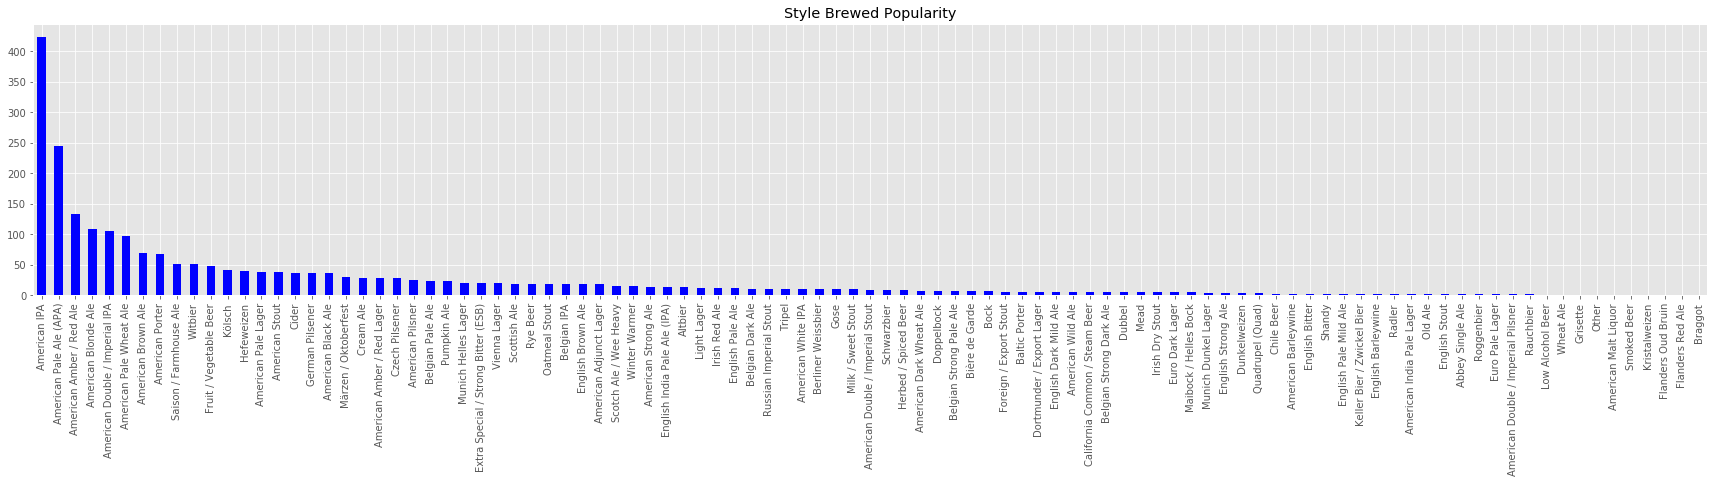

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [57]:
style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(30,5))
plt.title("Style Brewed Popularity")
state_chart.set_xlabel("Style")
state_chart.set_ylabel("Number of Times Brewed")
plt.show()
plt.tight_layout

In [58]:
state_data = poop_df["state"].value_counts()

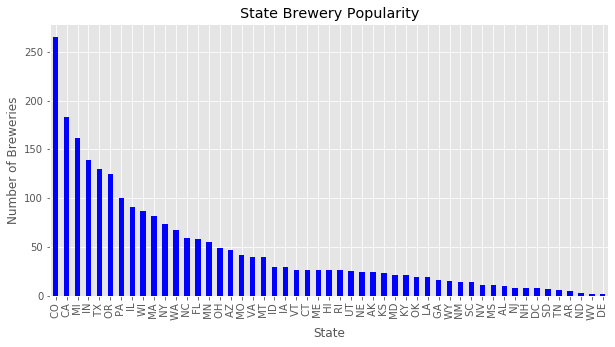

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [59]:
state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("State Brewery Popularity")
state_chart.set_xlabel("State")
state_chart.set_ylabel("Number of Breweries")
plt.show()
plt.tight_layout

In [60]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

,style
state,
MN,American IPA
MN,Milk / Sweet Stout
MN,English Brown Ale
MN,Pumpkin Ale
MN,American Porter
...,...
NY,Hefeweizen
NY,American IPA
NY,Milk / Sweet Stout


In [61]:
state_and_style_df = pd.DataFrame(state_and_style)

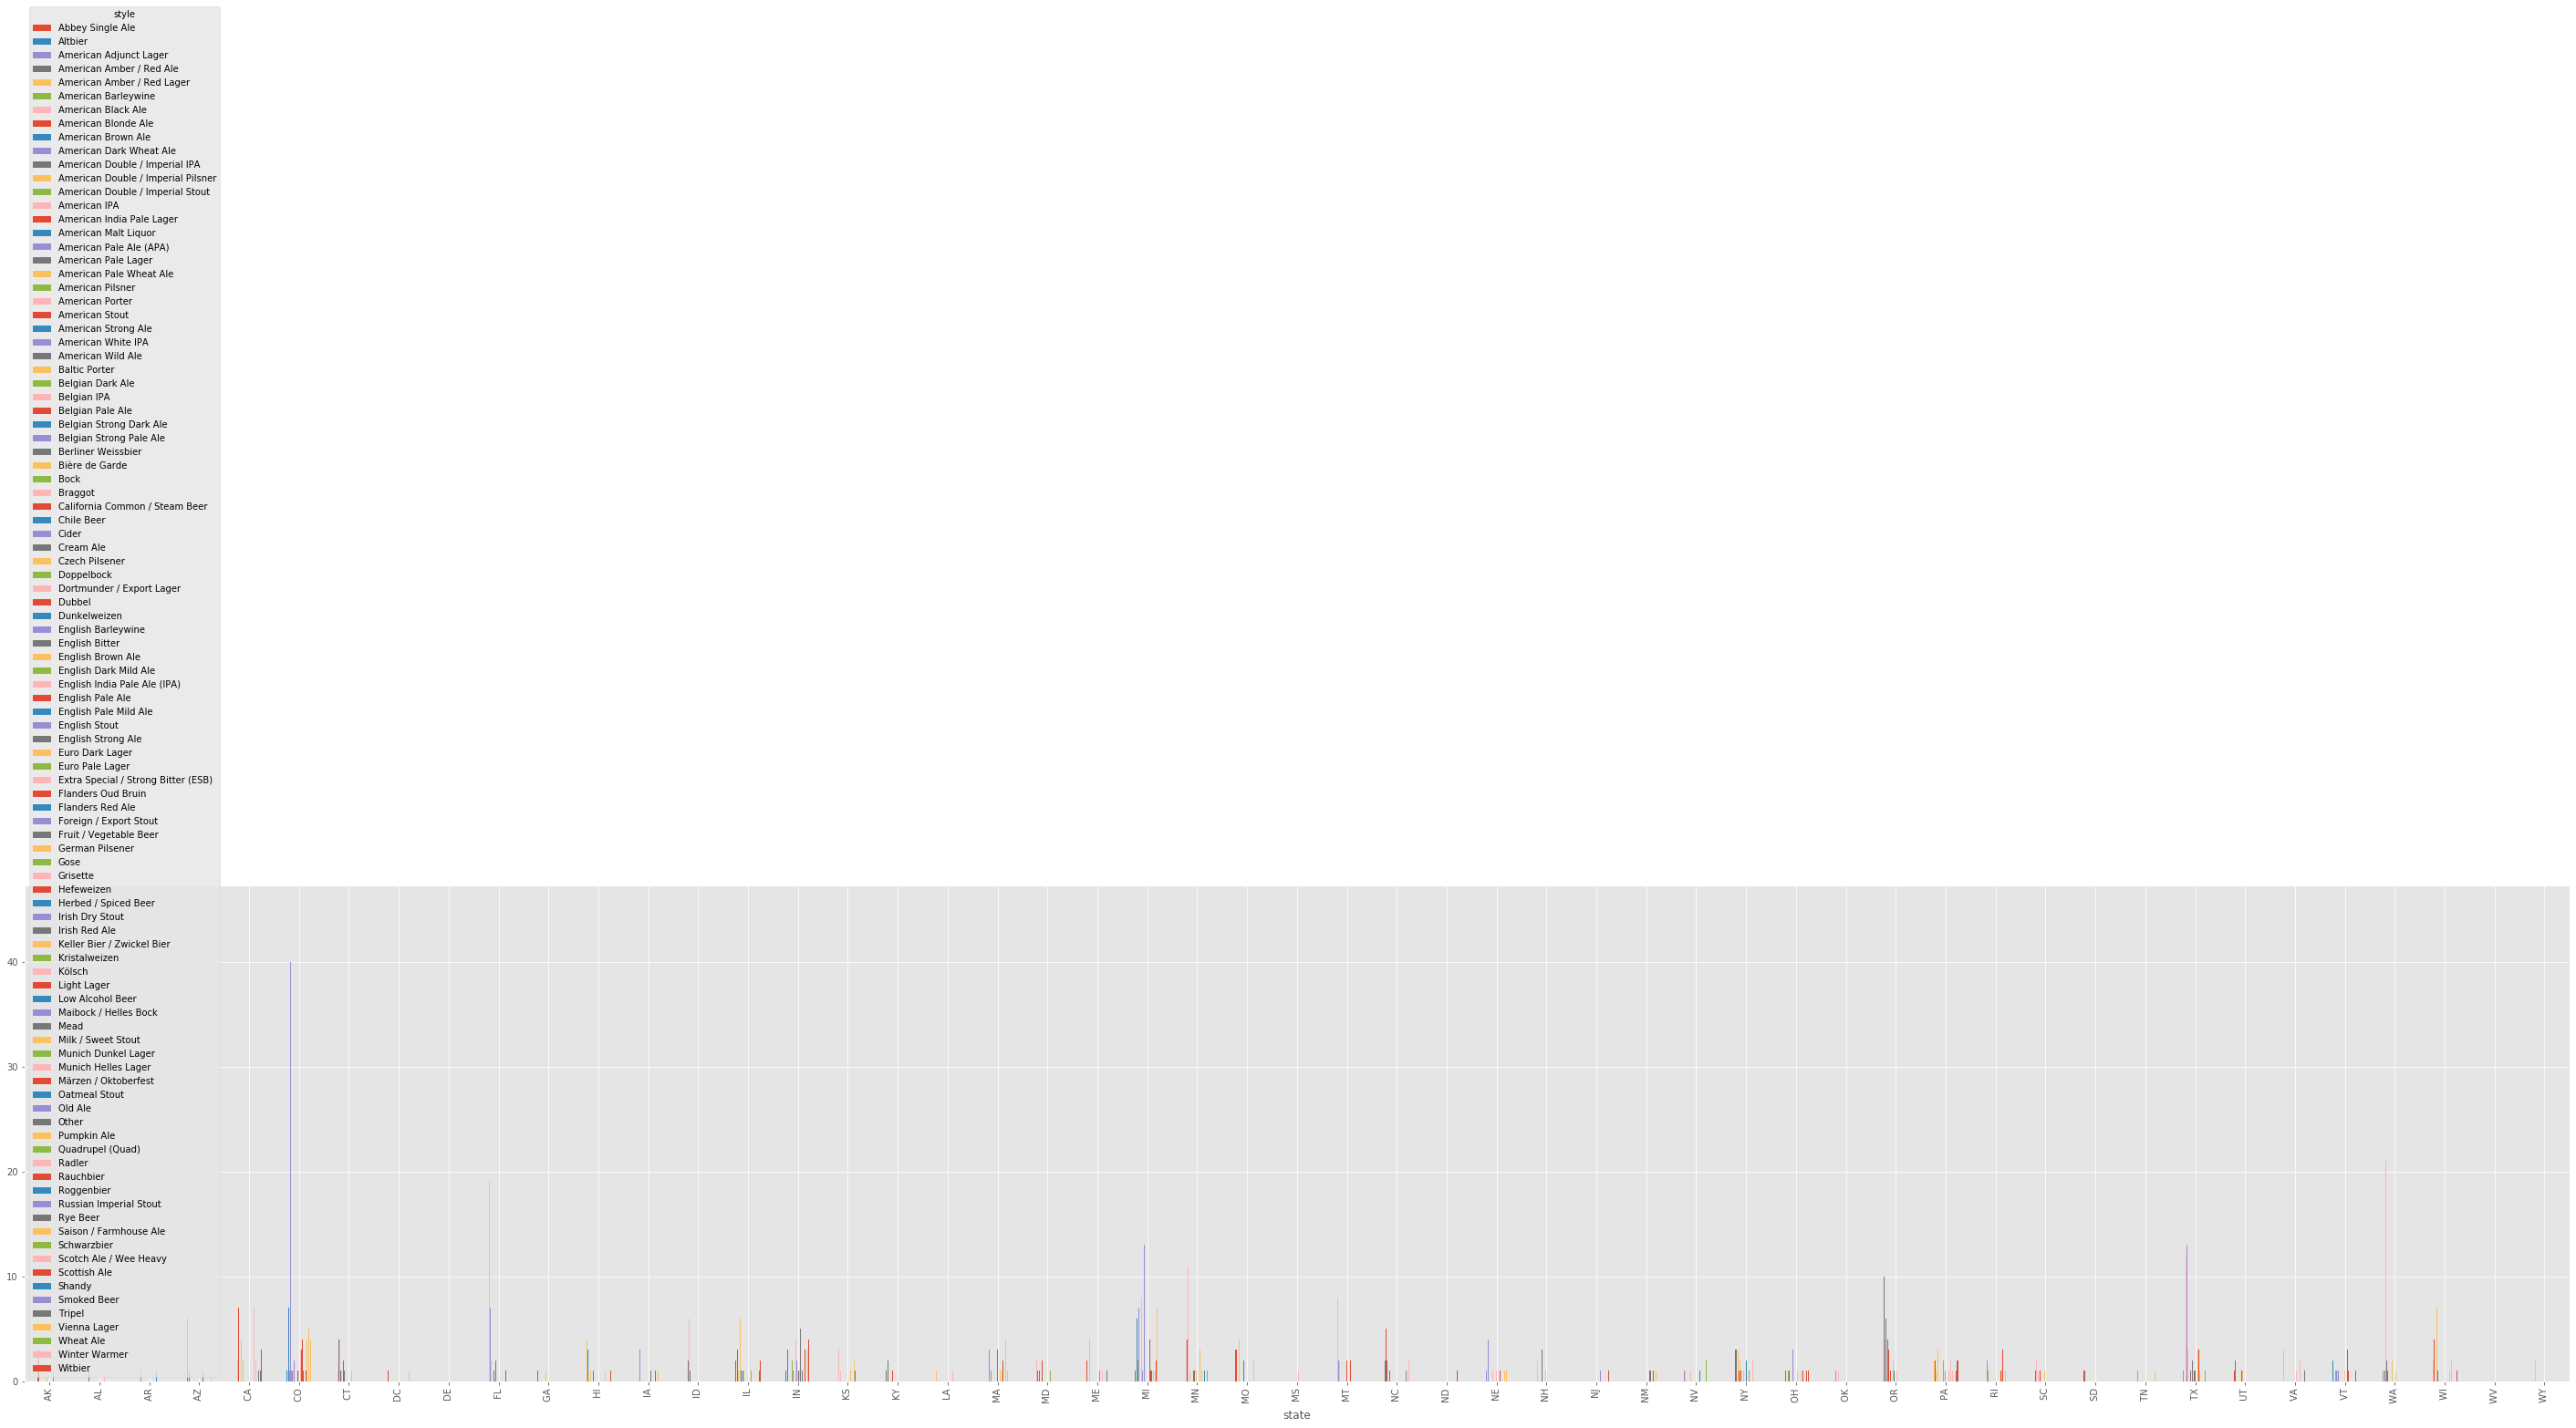

In [62]:
plt.style.use('ggplot')

state_and_style_df.groupby(['state', 'style'])\
      .style.count().unstack().plot.bar(legend=True, figsize=(50,10))

In [63]:
abv_and_style = poop_df[["abv","style"]]
abv_and_style = state_and_style.set_index("style")
abv_and_style

""
style
American IPA
Milk / Sweet Stout
English Brown Ale
Pumpkin Ale
American Porter
...
Hefeweizen
American IPA
Milk / Sweet Stout


In [64]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

,style
state,
MN,American IPA
MN,Milk / Sweet Stout
MN,English Brown Ale
MN,Pumpkin Ale
MN,American Porter
...,...
NY,Hefeweizen
NY,American IPA
NY,Milk / Sweet Stout


In [65]:
poop_df.nlargest(5, ['abv'])

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


In [67]:
top_5 = poop_df.nlargest(5, ['abv'])

In [72]:
top_5 = top_5[["style","abv"]]
top_5 = top_5.set_index("style")
top_5

,abv
style,
Quadrupel (Quad),0.128
English Barleywine,0.125
Russian Imperial Stout,0.120
Rye Beer,0.104
Baltic Porter,0.100


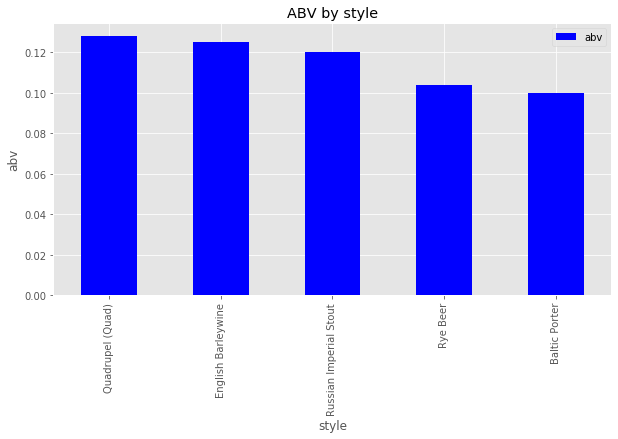

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [73]:
#state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
# plt.title("State Brewery Popularity")
# state_chart.set_xlabel("State")
# state_chart.set_ylabel("Number of Breweries")
# plt.show()
# plt.tight_layout

xlabel = 'style'
ylabel = 'abv'
top_5_chart = top_5.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("ABV by style")
top_5_chart.set_xlabel("style")
top_5_chart.set_ylabel("abv")
plt.show()
plt.tight_layout

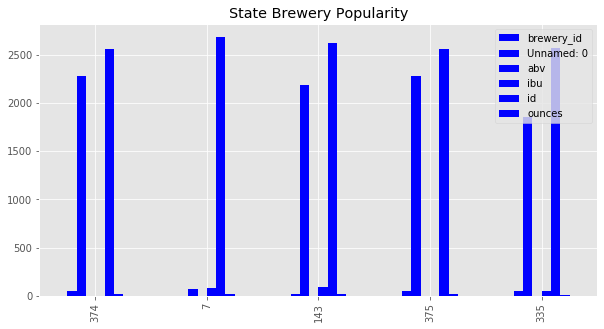

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [66]:
abv_chart = abv_data.groupby(['abv'])['style']

abv_chart.plot(kind='bar', title='ABV by Beer', ylabel='style',
         xlabel='ABV', figsize=(6, 5))

TypeError: no numeric data to plot

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


In [ ]:
\